In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import plotly.express as px
from sklearn.metrics import f1_score
from google.colab.patches import cv2_imshow
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
import seaborn as sns

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/ml/Augmented_dataset"

/content/drive/MyDrive/ml/Augmented_dataset


In [ ]:
image = list()
classes = list()
count=0
path = "0/*.jpg"
for file in glob.glob(path):     
  img=cv2.imread(file)
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  if(count>=500):
     break
  image.append(img2)#append all the image in imge
  classes.append(0)#append all the class in classes
  count+=1

print(len(image))
print(len(classes))
print(count)

500
500
500


In [ ]:
count=0
path = "1/*.jpg"
for file in glob.glob(path):     
  img=cv2.imread(file)
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  if(count>=500):
     break
  image.append(img2)#append all the image in imge
  classes.append(1)#append all the class in classes
  count+=1
print(len(image))
print(len(classes))
print(count)

1000
1000
500


In [ ]:
count=0
path = "2/*.jpg"
for file in glob.glob(path):     
  img=cv2.imread(file)
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  if(count>=500):
     break
  image.append(img2)#append all the image in imge
  classes.append(2)#append all the class in classes
  count+=1
print(len(image))
print(len(classes))
print(count)

1500
1500
500


In [ ]:
count=0
path = "3/*.jpg"
for file in glob.glob(path):     
  img=cv2.imread(file)
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  if(count>=500):
     break
  image.append(img2)#append all the image in imge
  classes.append(3)#append all the class in classes
  count+=1
print(len(image))
print(len(classes))
print(count)

2000
2000
500


In [ ]:
image=np.array(image)
classes=np.array(classes)

In [ ]:
image.shape

(2000, 256, 1600)

In [ ]:
# classes=list()
# for i in range(0,4) :
#     for j in range(0,245):
#         classes.append(i)

In [ ]:
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
    ################################################################
    #START ADDING DATA TO THE DATAFRAME
  
                
         #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr

        # GLCM = greycomatrix(img, [1], np.pi/4)#0,pi/4,pi/2,3pi/4,pi,5pi/4,3pi/2,7pi/4       
        # GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        # df['Energy'] = GLCM_Energy
        # GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        # df['Corr'] = GLCM_corr       
        # GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        # df['Diss_sim'] = GLCM_diss       
        # GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        # df['Homogen'] = GLCM_hom       
        # GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        # df['Contrast'] = GLCM_contr

        GLCM2 = greycomatrix(img, [1], [np.pi/4])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [1], [np.pi/2])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3

        GLCM4 = greycomatrix(img, [1], [3*np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [1], [np.pi])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        GLCM6 = greycomatrix(img, [1], [5*np.pi/4])       
        GLCM_Energy6 = greycoprops(GLCM6, 'energy')[0]
        df['Energy6'] = GLCM_Energy6
        GLCM_corr6 = greycoprops(GLCM6, 'correlation')[0]
        df['Corr6'] = GLCM_corr6       
        GLCM_diss6 = greycoprops(GLCM6, 'dissimilarity')[0]
        df['Diss_sim6'] = GLCM_diss6       
        GLCM_hom6 = greycoprops(GLCM6, 'homogeneity')[0]
        df['Homogen6'] = GLCM_hom6    
        GLCM_contr6 = greycoprops(GLCM6, 'contrast')[0]
        df['Contrast6'] = GLCM_contr6

        GLCM7 = greycomatrix(img, [1], [3*np.pi/2])       
        GLCM_Energy7 = greycoprops(GLCM7, 'energy')[0]
        df['Energy7'] = GLCM_Energy7
        GLCM_corr7 = greycoprops(GLCM7, 'correlation')[0]
        df['Corr7'] = GLCM_corr7      
        GLCM_diss7 = greycoprops(GLCM7, 'dissimilarity')[0]
        df['Diss_sim7'] = GLCM_diss7       
        GLCM_hom7 = greycoprops(GLCM7, 'homogeneity')[0]
        df['Homogen7'] = GLCM_hom7       
        GLCM_contr7 = greycoprops(GLCM7, 'contrast')[0]
        df['Contrast7'] = GLCM_contr7

        GLCM8 = greycomatrix(img, [1], [7*np.pi/4])       
        GLCM_Energy8 = greycoprops(GLCM8, 'energy')[0]
        df['Energy8'] = GLCM_Energy8
        GLCM_corr8 = greycoprops(GLCM8, 'correlation')[0]
        df['Corr8'] = GLCM_corr8       
        GLCM_diss8 = greycoprops(GLCM8, 'dissimilarity')[0]
        df['Diss_sim8'] = GLCM_diss8       
        GLCM_hom8 = greycoprops(GLCM8, 'homogeneity')[0]
        df['Homogen8'] = GLCM_hom8       
        GLCM_contr8 = greycoprops(GLCM8, 'contrast')[0]
        df['Contrast8'] = GLCM_contr8

        GLCM9 = greycomatrix(img, [3], [0])       
        GLCM_Energy9 = greycoprops(GLCM9, 'energy')[0]
        df['Energy9'] = GLCM_Energy9
        GLCM_corr9 = greycoprops(GLCM9, 'correlation')[0]
        df['Corr9'] = GLCM_corr9       
        GLCM_diss9 = greycoprops(GLCM9, 'dissimilarity')[0]
        df['Diss_sim9'] = GLCM_diss9       
        GLCM_hom9 = greycoprops(GLCM9, 'homogeneity')[0]
        df['Homogen9'] = GLCM_hom9       
        GLCM_contr9 = greycoprops(GLCM9, 'contrast')[0]
        df['Contrast9'] = GLCM_contr9

        GLCM10 = greycomatrix(img, [3], [np.pi/4])       
        GLCM_Energy10 = greycoprops(GLCM10, 'energy')[0]
        df['Energy10'] = GLCM_Energy10
        GLCM_corr10 = greycoprops(GLCM10, 'correlation')[0]
        df['Corr10'] = GLCM_corr10    
        GLCM_diss10 = greycoprops(GLCM10, 'dissimilarity')[0]
        df['Diss_sim10'] = GLCM_diss10       
        GLCM_hom10 = greycoprops(GLCM10, 'homogeneity')[0]
        df['Homogen10'] = GLCM_hom10       
        GLCM_contr10 = greycoprops(GLCM10, 'contrast')[0]
        df['Contrast10'] = GLCM_contr10

        GLCM11 = greycomatrix(img, [3], [np.pi/2])       
        GLCM_Energy11 = greycoprops(GLCM11, 'energy')[0]
        df['Energy11'] = GLCM_Energy11
        GLCM_corr11 = greycoprops(GLCM11, 'correlation')[0]
        df['Corr11'] = GLCM_corr11   
        GLCM_diss11 = greycoprops(GLCM11, 'dissimilarity')[0]
        df['Diss_sim11'] = GLCM_diss11       
        GLCM_hom11 = greycoprops(GLCM11, 'homogeneity')[0]
        df['Homogen11'] = GLCM_hom11       
        GLCM_contr11 = greycoprops(GLCM11, 'contrast')[0]
        df['Contrast11'] = GLCM_contr11

        GLCM12 = greycomatrix(img, [3], [3*np.pi/4])       
        GLCM_Energy12 = greycoprops(GLCM12, 'energy')[0]
        df['Energy12'] = GLCM_Energy12
        GLCM_corr12 = greycoprops(GLCM12, 'correlation')[0]
        df['Corr12'] = GLCM_corr12       
        GLCM_diss12 = greycoprops(GLCM12, 'dissimilarity')[0]
        df['Diss_sim12'] = GLCM_diss12       
        GLCM_hom12 = greycoprops(GLCM12, 'homogeneity')[0]
        df['Homogen12'] = GLCM_hom12   
        GLCM_contr12 = greycoprops(GLCM12, 'contrast')[0]
        df['Contrast12'] = GLCM_contr12
        
        GLCM13 = greycomatrix(img, [3], [np.pi])       
        GLCM_Energy13 = greycoprops(GLCM13, 'energy')[0]
        df['Energy13'] = GLCM_Energy13
        GLCM_corr13 = greycoprops(GLCM13, 'correlation')[0]
        df['Corr13'] = GLCM_corr13
        GLCM_diss13 = greycoprops(GLCM13, 'dissimilarity')[0]
        df['Diss_sim13'] = GLCM_diss13       
        GLCM_hom13 = greycoprops(GLCM13, 'homogeneity')[0]
        df['Homogen13'] = GLCM_hom13   
        GLCM_contr13 = greycoprops(GLCM13, 'contrast')[0]
        df['Contrast13'] = GLCM_contr13
        
        GLCM14 = greycomatrix(img, [3], [5*np.pi/4])       
        GLCM_Energy14 = greycoprops(GLCM14, 'energy')[0]
        df['Energy14'] = GLCM_Energy14
        GLCM_corr14 = greycoprops(GLCM14, 'correlation')[0]
        df['Corr14'] = GLCM_corr14
        GLCM_diss14 = greycoprops(GLCM14, 'dissimilarity')[0]
        df['Diss_sim14'] = GLCM_diss14       
        GLCM_hom14 = greycoprops(GLCM14, 'homogeneity')[0]
        df['Homogen14'] = GLCM_hom14 
        GLCM_contr14 = greycoprops(GLCM14, 'contrast')[0]
        df['Contrast14'] = GLCM_contr14

        GLCM15 = greycomatrix(img, [3], [3*np.pi/2])       
        GLCM_Energy15 = greycoprops(GLCM15, 'energy')[0]
        df['Energy15'] = GLCM_Energy15
        GLCM_corr15 = greycoprops(GLCM15, 'correlation')[0]
        df['Corr15'] = GLCM_corr15
        GLCM_diss15 = greycoprops(GLCM15, 'dissimilarity')[0]
        df['Diss_sim15'] = GLCM_diss15     
        GLCM_hom15 = greycoprops(GLCM15, 'homogeneity')[0]
        df['Homogen15'] = GLCM_hom15       
        GLCM_contr15 = greycoprops(GLCM15, 'contrast')[0]
        df['Contrast15'] = GLCM_contr15

        GLCM16 = greycomatrix(img, [3], [7*np.pi/4])       
        GLCM_Energy16 = greycoprops(GLCM16, 'energy')[0]
        df['Energy16'] = GLCM_Energy16
        GLCM_corr16 = greycoprops(GLCM16, 'correlation')[0]
        df['Corr16'] = GLCM_corr16
        GLCM_diss16 = greycoprops(GLCM16, 'dissimilarity')[0]
        df['Diss_sim16'] = GLCM_diss16     
        GLCM_hom16 = greycoprops(GLCM16, 'homogeneity')[0]
        df['Homogen16'] = GLCM_hom16 
        GLCM_contr16 = greycoprops(GLCM16, 'contrast')[0]
        df['Contrast16'] = GLCM_contr16

        GLCM17 = greycomatrix(img, [5], [0])       
        GLCM_Energy17 = greycoprops(GLCM17, 'energy')[0]
        df['Energy17'] = GLCM_Energy17
        GLCM_corr17 = greycoprops(GLCM17, 'correlation')[0]
        df['Corr17'] = GLCM_corr17 
        GLCM_diss17 = greycoprops(GLCM17, 'dissimilarity')[0]
        df['Diss_sim17'] = GLCM_diss17       
        GLCM_hom17 = greycoprops(GLCM17, 'homogeneity')[0]
        df['Homogen17'] = GLCM_hom17   
        GLCM_contr17 = greycoprops(GLCM17, 'contrast')[0]
        df['Contrast17'] = GLCM_contr17

        GLCM18 = greycomatrix(img, [5], [np.pi/4])       
        GLCM_Energy18 = greycoprops(GLCM18, 'energy')[0]
        df['Energy18'] = GLCM_Energy18
        GLCM_corr18 = greycoprops(GLCM18, 'correlation')[0]
        df['Corr18'] = GLCM_corr18
        GLCM_diss18 = greycoprops(GLCM18, 'dissimilarity')[0]
        df['Diss_sim18'] = GLCM_diss18     
        GLCM_hom18 = greycoprops(GLCM18, 'homogeneity')[0]
        df['Homogen18'] = GLCM_hom18 
        GLCM_contr18 = greycoprops(GLCM18, 'contrast')[0]
        df['Contrast18'] = GLCM_contr18

        
        GLCM19 = greycomatrix(img, [5], [3*np.pi/4])       
        GLCM_Energy19 = greycoprops(GLCM19, 'energy')[0]
        df['Energy19'] = GLCM_Energy19
        GLCM_corr19 = greycoprops(GLCM19, 'correlation')[0]
        df['Corr19'] = GLCM_corr19
        GLCM_diss19 = greycoprops(GLCM19, 'dissimilarity')[0]
        df['Diss_sim19'] = GLCM_diss19       
        GLCM_hom19 = greycoprops(GLCM19, 'homogeneity')[0]
        df['Homogen19'] = GLCM_hom19   
        GLCM_contr19 = greycoprops(GLCM19, 'contrast')[0]
        df['Contrast19'] = GLCM_contr19
        
        GLCM20 = greycomatrix(img, [5], [np.pi])       
        GLCM_Energy20 = greycoprops(GLCM20, 'energy')[0]
        df['Energy20'] = GLCM_Energy20
        GLCM_corr20 = greycoprops(GLCM20, 'correlation')[0]
        df['Corr20'] = GLCM_corr20
        GLCM_diss20 = greycoprops(GLCM20, 'dissimilarity')[0]
        df['Diss_sim20'] = GLCM_diss20     
        GLCM_hom20 = greycoprops(GLCM20, 'homogeneity')[0]
        df['Homogen20'] = GLCM_hom20 
        GLCM_contr20 = greycoprops(GLCM20, 'contrast')[0]
        df['Contrast20'] = GLCM_contr20
        
        GLCM21 = greycomatrix(img, [5], [5*np.pi/4])       
        GLCM_Energy21 = greycoprops(GLCM21, 'energy')[0]
        df['Energy21'] = GLCM_Energy21
        GLCM_corr21 = greycoprops(GLCM21, 'correlation')[0]
        df['Corr21'] = GLCM_corr21
        GLCM_diss21 = greycoprops(GLCM21, 'dissimilarity')[0]
        df['Diss_sim21'] = GLCM_diss21     
        GLCM_hom21 = greycoprops(GLCM21, 'homogeneity')[0]
        df['Homogen21'] = GLCM_hom21 
        GLCM_contr21 = greycoprops(GLCM21, 'contrast')[0]
        df['Contrast21'] = GLCM_contr21

        GLCM22 = greycomatrix(img, [5], [3*np.pi/2])       
        GLCM_Energy22 = greycoprops(GLCM22, 'energy')[0]
        df['Energy22'] = GLCM_Energy22
        GLCM_corr22 = greycoprops(GLCM22, 'correlation')[0]
        df['Corr22'] = GLCM_corr22
        GLCM_diss22 = greycoprops(GLCM22, 'dissimilarity')[0]
        df['Diss_sim22'] = GLCM_diss22     
        GLCM_hom22 = greycoprops(GLCM22, 'homogeneity')[0]
        df['Homogen22'] = GLCM_hom22 
        GLCM_contr22 = greycoprops(GLCM22, 'contrast')[0]
        df['Contrast22'] = GLCM_contr22

        GLCM23 = greycomatrix(img, [5], [7*np.pi/4])       
        GLCM_Energy23 = greycoprops(GLCM23, 'energy')[0]
        df['Energy23'] = GLCM_Energy23
        GLCM_corr23 = greycoprops(GLCM23, 'correlation')[0]
        df['Corr23'] = GLCM_corr23  
        GLCM_diss23 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim23'] = GLCM_diss23     
        GLCM_hom23 = greycoprops(GLCM23, 'homogeneity')[0]
        df['Homogen23'] = GLCM_hom23   
        GLCM_contr23 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast23'] = GLCM_contr23

        GLCM24 = greycomatrix(img, [5], [np.pi/2])       
        GLCM_Energy24 = greycoprops(GLCM24, 'energy')[0]
        df['Energy24'] = GLCM_Energy24
        GLCM_corr24 = greycoprops(GLCM24, 'correlation')[0]
        df['Corr24'] = GLCM_corr24
        GLCM_diss24 = greycoprops(GLCM24, 'dissimilarity')[0]
        df['Diss_sim24'] = GLCM_diss24    
        GLCM_hom24 = greycoprops(GLCM24, 'homogeneity')[0]
        df['Homogen24'] = GLCM_hom24
        GLCM_contr24 = greycoprops(GLCM24, 'contrast')[0]
        df['Contrast24'] = GLCM_contr24

        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [ ]:
image_features = feature_extractor(image)
X_for_ML =image_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:271: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:273: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:275: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame

In [ ]:
X_for_ML

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Energy23,Corr23,Diss_sim23,Homogen23,Contrast23,Energy24,Corr24,Diss_sim24,Homogen24,Contrast24
0,0.019777,0.990054,4.277598,0.247156,36.444905,0.015949,0.978066,6.535472,0.166722,80.384235,...,0.013144,0.952928,4.277598,0.116075,36.444905,0.013461,0.958588,9.062958,0.120719,152.274537
0,0.016515,0.975922,6.669503,0.147883,76.860101,0.014711,0.962917,8.351634,0.119170,118.402612,...,0.012613,0.929095,6.669503,0.087605,76.860101,0.013225,0.940476,10.481345,0.097133,190.141444
0,0.019613,0.977942,5.333277,0.190679,53.503486,0.016877,0.962830,7.083770,0.142722,90.136433,...,0.015222,0.940995,5.333277,0.118471,53.503486,0.014601,0.932951,9.543376,0.107447,162.435408
0,0.032360,0.916951,4.430577,0.232241,45.871854,0.027141,0.850907,6.198573,0.167969,82.380608,...,0.023766,0.758917,4.430577,0.128228,45.871854,0.024025,0.765533,7.989064,0.131949,129.923675
0,0.185430,0.997988,2.362763,0.483637,16.949028,0.179079,0.995940,3.527165,0.409657,34.319278,...,0.159459,0.984795,2.362763,0.336759,16.949028,0.164346,0.984211,6.419888,0.341094,137.554156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.032551,0.983889,2.914644,0.331691,19.504085,0.026984,0.969194,4.097218,0.242583,37.290645,...,0.024601,0.957342,2.914644,0.200316,19.504085,0.024147,0.948401,5.233098,0.195785,62.479522
0,0.023281,0.959195,5.437246,0.196526,62.139897,0.020272,0.936261,6.990720,0.152456,97.043208,...,0.016084,0.756143,5.437246,0.095861,62.139897,0.015792,0.769672,12.681215,0.092473,350.278630
0,0.017407,0.974226,6.418169,0.154440,71.949698,0.014794,0.954254,8.743813,0.112510,127.676489,...,0.013670,0.935901,6.418169,0.094663,71.949698,0.013657,0.935585,10.387191,0.095386,179.732166
0,0.026672,0.959417,4.932778,0.233624,56.668208,0.021573,0.886251,8.004159,0.161809,158.685423,...,0.017104,0.682753,4.932778,0.102597,56.668208,0.017026,0.664312,13.970127,0.101692,466.521736


In [ ]:
df=pd.DataFrame(X_for_ML)

In [ ]:
df['target'] = classes.tolist()
df

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Corr23,Diss_sim23,Homogen23,Contrast23,Energy24,Corr24,Diss_sim24,Homogen24,Contrast24,target
0,0.019777,0.990054,4.277598,0.247156,36.444905,0.015949,0.978066,6.535472,0.166722,80.384235,...,0.952928,4.277598,0.116075,36.444905,0.013461,0.958588,9.062958,0.120719,152.274537,0
0,0.016515,0.975922,6.669503,0.147883,76.860101,0.014711,0.962917,8.351634,0.119170,118.402612,...,0.929095,6.669503,0.087605,76.860101,0.013225,0.940476,10.481345,0.097133,190.141444,0
0,0.019613,0.977942,5.333277,0.190679,53.503486,0.016877,0.962830,7.083770,0.142722,90.136433,...,0.940995,5.333277,0.118471,53.503486,0.014601,0.932951,9.543376,0.107447,162.435408,0
0,0.032360,0.916951,4.430577,0.232241,45.871854,0.027141,0.850907,6.198573,0.167969,82.380608,...,0.758917,4.430577,0.128228,45.871854,0.024025,0.765533,7.989064,0.131949,129.923675,0
0,0.185430,0.997988,2.362763,0.483637,16.949028,0.179079,0.995940,3.527165,0.409657,34.319278,...,0.984795,2.362763,0.336759,16.949028,0.164346,0.984211,6.419888,0.341094,137.554156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.032551,0.983889,2.914644,0.331691,19.504085,0.026984,0.969194,4.097218,0.242583,37.290645,...,0.957342,2.914644,0.200316,19.504085,0.024147,0.948401,5.233098,0.195785,62.479522,3
0,0.023281,0.959195,5.437246,0.196526,62.139897,0.020272,0.936261,6.990720,0.152456,97.043208,...,0.756143,5.437246,0.095861,62.139897,0.015792,0.769672,12.681215,0.092473,350.278630,3
0,0.017407,0.974226,6.418169,0.154440,71.949698,0.014794,0.954254,8.743813,0.112510,127.676489,...,0.935901,6.418169,0.094663,71.949698,0.013657,0.935585,10.387191,0.095386,179.732166,3
0,0.026672,0.959417,4.932778,0.233624,56.668208,0.021573,0.886251,8.004159,0.161809,158.685423,...,0.682753,4.932778,0.102597,56.668208,0.017026,0.664312,13.970127,0.101692,466.521736,3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [ ]:
#select the first 13 columns as features
x = df.iloc[:,:120]
#Select the last column for target 
y = df.iloc[:,-1]

In [ ]:
x.shape,y.shape

((2000, 120), (2000,))

In [ ]:
feature_names = tuple(x.columns)
feature_names

('Energy',
 'Corr',
 'Diss_sim',
 'Homogen',
 'Contrast',
 'Energy2',
 'Corr2',
 'Diss_sim2',
 'Homogen2',
 'Contrast2',
 'Energy3',
 'Corr3',
 'Diss_sim3',
 'Homogen3',
 'Contrast3',
 'Energy4',
 'Corr4',
 'Diss_sim4',
 'Homogen4',
 'Contrast4',
 'Energy5',
 'Corr5',
 'Diss_sim5',
 'Homogen5',
 'Contrast5',
 'Energy6',
 'Corr6',
 'Diss_sim6',
 'Homogen6',
 'Contrast6',
 'Energy7',
 'Corr7',
 'Diss_sim7',
 'Homogen7',
 'Contrast7',
 'Energy8',
 'Corr8',
 'Diss_sim8',
 'Homogen8',
 'Contrast8',
 'Energy9',
 'Corr9',
 'Diss_sim9',
 'Homogen9',
 'Contrast9',
 'Energy10',
 'Corr10',
 'Diss_sim10',
 'Homogen10',
 'Contrast10',
 'Energy11',
 'Corr11',
 'Diss_sim11',
 'Homogen11',
 'Contrast11',
 'Energy12',
 'Corr12',
 'Diss_sim12',
 'Homogen12',
 'Contrast12',
 'Energy13',
 'Corr13',
 'Diss_sim13',
 'Homogen13',
 'Contrast13',
 'Energy14',
 'Corr14',
 'Diss_sim14',
 'Homogen14',
 'Contrast14',
 'Energy15',
 'Corr15',
 'Diss_sim15',
 'Homogen15',
 'Contrast15',
 'Energy16',
 'Corr16',
 'Diss

In [ ]:
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           rfc(),
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=0)

sfs1 = sfs1.fit(x, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   49.9s finished

[2022-05-12 10:41:50] Features: 1/120 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 119 out of 119 | elapsed:   46.5s finished

[2022-05-12 10:42:37] Features: 2/120 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:   45.1s finished

[2022-05-12 10:43:22] Features: 3/120 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining

In [ ]:
sfs1.subsets_

In [ ]:
sfs1.get_metric_dict()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


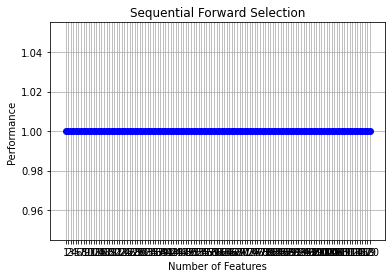

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [ ]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('Homogen',), (3,))

In [ ]:
df1 = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
#print(df[["feature_idx","avg_score"]])
names = df1['avg_score'].tolist()
print(names)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
x = df.iloc[:,3:4]

,Homogen
0,0.247156
0,0.147883
0,0.190679
0,0.232241
0,0.483637
...,...
0,0.331691
0,0.196526
0,0.154440
0,0.233624


In [ ]:
from sklearn.model_selection import train_test_split
x_train_, x_test_, y_train, y_test =0,0,0,0
x_train_, x_test_, y_train, y_test =train_test_split(x,classes,test_size=0.15,random_state=15)

In [ ]:
print(x_train_.shape)
print(y_train.shape)
print(x_test_.shape)
print(y_test.shape)

(1700, 1)
(1700,)
(300, 1)
(300,)


In [ ]:
x_train=x_train_
x_test=x_test_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
no_of_estimators = list()

for estimator in range(1,100,5):
    RF_model = RandomForestClassifier(n_estimators=estimator)
    RF_model.fit(x_train,y_train)
    #for train set
    print("estimator:",estimator)
    pred_class_train = RF_model.predict(x_train)
    print (classification_report(y_train, pred_class_train))
    train_accuracy.append(metrics.accuracy_score(y_train, pred_class_train))
    
    #for test class
    pred_class_test = RF_model.predict(x_test)
    print (classification_report(y_test, pred_class_test))
    # print(y_test)
    # print(pred_class_test)
    test_accuracy.append(metrics.accuracy_score(y_test, pred_class_test))
    no_of_estimators.append(estimator)
    results = confusion_matrix(y_test, pred_class_test)
    print(results)

estimator: 1
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       426
           1       0.75      0.81      0.78       426
           2       0.78      0.70      0.74       431
           3       0.73      0.77      0.75       417

    accuracy                           0.75      1700
   macro avg       0.75      0.75      0.75      1700
weighted avg       0.75      0.75      0.75      1700

              precision    recall  f1-score   support

           0       0.27      0.26      0.26        74
           1       0.37      0.41      0.38        74
           2       0.29      0.29      0.29        69
           3       0.37      0.35      0.36        83

    accuracy                           0.33       300
   macro avg       0.32      0.33      0.32       300
weighted avg       0.33      0.33      0.33       300

[[19 15 14 26]
 [17 30 14 13]
 [18 20 20 11]
 [17 17 20 29]]
estimator: 6
              precision    recall  f1-score

In [ ]:
for feature in range(1,120):
  mod=SelectKBest(chi2,k=feature)
  new1=mod.fit(x,y)
  x_1=new1.transform(x)
  x_train_, x_test_, y_train, y_test =0,0,0,0
  x_train_, x_test_, y_train, y_test =train_test_split(x_1,classes,test_size=0.15,random_state=15)
  print("Feature:",estimator)
  for estimator in range(1,100,5):
    RF_model = RandomForestClassifier(n_estimators=estimator)
    RF_model.fit(x_train,y_train)
    #for train set
    print("estimator:",estimator)
    pred_class_train = RF_model.predict(x_train)
    # print (classification_report(y_train, pred_class_train))
    train_accuracy.append(metrics.accuracy_score(y_train, pred_class_train))
    print(metrics.accuracy_score(y_train, pred_class_train))
    # #for test class
    pred_class_test = RF_model.predict(x_test)
    print(metrics.accuracy_score(y_test, pred_class_test))
    # print (classification_report(y_test, pred_class_test))
    # # print(y_test)
    # # print(pred_class_test)
    test_accuracy.append(metrics.accuracy_score(y_test, pred_class_test))
    print()
    # no_of_estimators.append(estimator)
    results = confusion_matrix(y_test, pred_class_test)
    print(results)

Streaming output truncated to the last 5000 lines.
 [ 8  7 10 58]]
estimator: 96
1.0
0.72

[[55 10  1  8]
 [11 49  9  5]
 [ 3  7 51  8]
 [ 8  6  8 61]]
Feature: 96
estimator: 1
0.8152941176470588
0.56

[[42 10  9 13]
 [15 32 19  8]
 [ 2 13 45  9]
 [ 8 12 14 49]]
estimator: 6
0.9594117647058824
0.65

[[51  9  4 10]
 [13 42 14  5]
 [ 6  7 49  7]
 [13 10  7 53]]
estimator: 11
0.9876470588235294
0.7066666666666667

[[53  7  6  8]
 [13 43 10  8]
 [ 5  5 55  4]
 [ 8  7  7 61]]
estimator: 16
0.9952941176470588
0.68

[[50 12  4  8]
 [ 9 45 12  8]
 [ 5  3 52  9]
 [12  7  7 57]]
estimator: 21
0.9982352941176471
0.7033333333333334

[[56  8  5  5]
 [12 48 10  4]
 [ 5  5 49 10]
 [ 8  8  9 58]]
estimator: 26
1.0
0.69

[[54 13  2  5]
 [11 46 11  6]
 [ 3  7 50  9]
 [10  9  7 57]]
estimator: 31
1.0
0.7133333333333334

[[54 13  2  5]
 [12 48 10  4]
 [ 3  5 55  6]
 [ 7  8 11 57]]
estimator: 36
1.0
0.7366666666666667

[[59  6  3  6]
 [11 49 11  3]
 [ 4  6 54  5]
 [ 8  8  8 59]]
estimator: 41
1.0
0.7166666

In [ ]:
print(train_accuracy)
print(test_accuracy)

[0.8188235294117647, 0.9729411764705882, 0.9923529411764705, 0.9952941176470588, 0.9976470588235294, 1.0, 0.9988235294117647, 0.9994117647058823, 0.9994117647058823, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8123529411764706, 0.9635294117647059, 0.9905882352941177, 0.9941176470588236, 0.9970588235294118, 1.0, 0.9988235294117647, 0.9994117647058823, 0.9994117647058823, 0.9994117647058823, 1.0, 1.0, 0.9994117647058823, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8294117647058824, 0.9705882352941176, 0.9923529411764705, 0.9964705882352941, 0.9958823529411764, 0.9988235294117647, 0.9982352941176471, 1.0, 0.9994117647058823, 1.0, 0.9994117647058823, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8164705882352942, 0.9552941176470588, 0.9876470588235294, 0.9929411764705882, 0.9970588235294118, 1.0, 0.9988235294117647, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9994117647058823, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.82, 0.9735294117647059, 0.9876470588235294, 0.9952941176470588, 0.9970588235294118, 0.9

In [ ]:
print(max(test_accuracy))

0.7566666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
train_accuracy = list()
test_accuracy = list()
max_depth = list()

for depth in range(10,100,5):
    imageTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    imageTree.fit(x_train,y_train)
    print("for depth :",depth)
    #for train
    pred_class_train = imageTree.predict(x_train)
    print (classification_report(y_train, pred_class_train))
    train_accuracy.append(metrics.accuracy_score(y_train, pred_class_train))
    
    #for test class
    pred_class_test = imageTree.predict(x_test)
    print (classification_report(y_test, pred_class_test))
    
    print(y_test)
    print(pred_class_test)
    test_accuracy.append(metrics.accuracy_score(y_test, pred_class_test))

for depth : 10
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       426
           1       0.94      0.98      0.96       426
           2       0.97      0.91      0.94       431
           3       0.95      0.94      0.95       417

    accuracy                           0.95      1700
   macro avg       0.95      0.95      0.95      1700
weighted avg       0.95      0.95      0.95      1700

              precision    recall  f1-score   support

           0       0.72      0.68      0.70        74
           1       0.72      0.77      0.75        74
           2       0.63      0.59      0.61        69
           3       0.70      0.73      0.72        83

    accuracy                           0.70       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300

[3 2 2 1 2 1 0 1 3 3 3 0 0 3 0 1 3 1 2 2 0 0 2 1 1 3 2 2 2 1 2 0 1 1 0 0 1
 3 0 3 0 1 3 0 3 0 0 3 1 0 3 3 0 1 2 3 2

In [ ]:
print(train_accuracy)
print(test_accuracy)

[0.9452941176470588, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6966666666666667, 0.6933333333333334, 0.6966666666666667, 0.7, 0.7033333333333334, 0.6866666666666666, 0.7033333333333334, 0.6733333333333333, 0.7066666666666667, 0.69, 0.7066666666666667, 0.68, 0.68, 0.6933333333333334, 0.6666666666666666, 0.6833333333333333, 0.72, 0.6966666666666667]


In [ ]:
#svm
from sklearn import svm
import time

In [ ]:
train_begin = time.time()
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train) 
train_end = time.time()
train_time = train_end - train_begin

In [ ]:
print(y_test)

[3 2 2 1 2 1 0 1 3 3 3 0 0 3 0 1 3 1 2 2 0 0 2 1 1 3 2 2 2 1 2 0 1 1 0 0 1
 3 0 3 0 1 3 0 3 0 0 3 1 0 3 3 0 1 2 3 2 2 1 2 1 2 3 0 2 1 0 0 0 1 3 1 0 2
 0 3 3 0 3 1 1 3 0 3 3 3 3 2 2 3 0 3 3 2 3 2 1 3 3 0 0 3 2 1 3 1 0 1 2 1 2
 3 0 3 0 2 2 1 3 3 0 1 3 1 1 2 3 2 1 2 1 0 3 3 1 1 3 2 1 2 2 2 3 2 3 0 1 2
 3 0 1 3 2 3 0 1 1 3 3 3 2 2 3 2 3 1 2 0 0 3 2 1 3 1 0 0 3 1 1 2 0 1 1 1 0
 1 2 2 0 3 0 1 1 3 0 3 3 0 0 1 1 1 2 1 0 0 0 1 1 2 1 3 2 3 0 1 1 1 0 2 0 3
 0 3 2 1 3 3 3 1 3 0 2 3 2 2 1 0 0 3 3 2 3 0 0 3 1 3 0 2 3 1 2 2 0 3 0 0 3
 2 3 2 0 0 0 1 2 2 1 0 2 3 3 2 0 0 1 3 1 1 1 0 2 2 2 2 2 2 1 3 0 0 3 0 2 0
 3 1 1 0]


In [ ]:
test_begin = time.time()
yhat = clf.predict(x_test)
test_end = time.time()
test_time = test_end - test_begin
print(yhat)

print(metrics.accuracy_score(y_test, yhat))
print(confusion_matrix(y_test, yhat))
print(classification_report(y_test, yhat))
print(train_time)
print(test_time)

[3 2 2 0 0 1 0 1 3 3 3 0 1 3 1 3 3 3 2 2 1 2 2 1 1 3 2 2 2 1 2 0 1 1 3 0 1
 3 0 3 2 1 3 0 3 0 0 3 1 0 3 3 0 1 2 2 2 0 0 0 0 0 0 1 2 1 0 2 1 2 3 2 2 2
 0 3 0 0 3 1 1 3 2 1 3 2 0 2 2 2 1 3 3 2 3 2 0 2 2 0 0 3 2 0 1 1 0 0 2 0 0
 3 1 3 3 2 0 2 0 2 2 1 1 0 1 2 0 2 0 2 2 1 0 3 1 1 3 2 1 2 2 0 3 1 2 1 2 2
 0 0 1 0 3 3 0 1 0 2 3 2 2 1 2 1 0 1 0 1 3 1 0 1 3 1 2 0 3 1 1 2 1 0 3 1 2
 0 2 2 0 0 0 1 1 0 0 3 0 3 1 1 1 0 2 1 0 0 0 1 0 2 0 3 2 3 1 0 1 0 0 2 0 3
 1 3 2 2 1 3 3 1 3 1 2 3 2 2 0 0 0 0 3 2 3 0 3 3 1 3 0 2 3 1 2 0 0 2 0 0 3
 3 1 2 0 0 1 2 2 0 2 2 2 0 3 2 0 0 1 3 1 3 0 0 2 2 2 2 2 3 1 3 0 0 3 0 2 0
 1 1 3 0]
0.63
[[44 16  9  5]
 [19 42  8  5]
 [11  3 52  3]
 [14  7 11 51]]
              precision    recall  f1-score   support

           0       0.50      0.59      0.54        74
           1       0.62      0.57      0.59        74
           2       0.65      0.75      0.70        69
           3       0.80      0.61      0.69        83

    accuracy                           0.63       30

In [ ]:
#Classifier implementing the k-nearest neighbors vote.
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#take k=4
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
yhat = neigh.predict(x_test)
yhat

array([3, 1, 2, 1, 0, 0, 0, 0, 3, 3, 2, 0, 1, 3, 0, 0, 3, 1, 2, 2, 0, 2,
       2, 1, 3, 3, 2, 2, 2, 1, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 2, 0, 1, 1,
       3, 0, 0, 3, 1, 0, 3, 3, 2, 0, 0, 2, 2, 3, 1, 3, 0, 1, 3, 3, 2, 2,
       0, 1, 2, 2, 1, 2, 0, 0, 0, 3, 0, 0, 3, 1, 2, 1, 0, 3, 1, 2, 3, 2,
       2, 2, 0, 1, 3, 1, 3, 2, 1, 2, 2, 0, 0, 3, 2, 1, 0, 1, 0, 0, 2, 1,
       2, 3, 0, 0, 1, 2, 2, 2, 3, 2, 0, 1, 3, 1, 3, 2, 2, 0, 0, 2, 1, 0,
       3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 3, 0, 2, 1, 0, 2, 0, 0, 1, 3, 3, 3,
       0, 1, 1, 2, 3, 2, 2, 3, 1, 1, 3, 1, 2, 1, 0, 3, 2, 1, 2, 1, 1, 0,
       3, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 3, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 3, 0, 3, 1, 0, 2, 0, 0, 1,
       0, 3, 1, 3, 2, 2, 3, 1, 3, 1, 3, 3, 2, 3, 2, 2, 1, 0, 0, 0, 3, 2,
       3, 0, 3, 2, 0, 3, 0, 2, 3, 1, 2, 0, 0, 2, 0, 0, 3, 2, 1, 2, 0, 0,
       0, 3, 2, 2, 1, 0, 2, 3, 3, 2, 0, 0, 1, 3, 3, 0, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 3, 1, 3, 0])

In [ ]:
y_test

array([3, 2, 2, 1, 2, 1, 0, 1, 3, 3, 3, 0, 0, 3, 0, 1, 3, 1, 2, 2, 0, 0,
       2, 1, 1, 3, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 3, 0, 3, 0, 1, 3, 0,
       3, 0, 0, 3, 1, 0, 3, 3, 0, 1, 2, 3, 2, 2, 1, 2, 1, 2, 3, 0, 2, 1,
       0, 0, 0, 1, 3, 1, 0, 2, 0, 3, 3, 0, 3, 1, 1, 3, 0, 3, 3, 3, 3, 2,
       2, 3, 0, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 3, 2, 1, 3, 1, 0, 1, 2, 1,
       2, 3, 0, 3, 0, 2, 2, 1, 3, 3, 0, 1, 3, 1, 1, 2, 3, 2, 1, 2, 1, 0,
       3, 3, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 3, 0, 1, 3, 2, 3,
       0, 1, 1, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 0, 0, 3, 2, 1, 3, 1, 0, 0,
       3, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 3, 0, 1, 1, 3, 0, 3, 3, 0,
       0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 3, 2, 3, 0, 1, 1, 1, 0, 2,
       0, 3, 0, 3, 2, 1, 3, 3, 3, 1, 3, 0, 2, 3, 2, 2, 1, 0, 0, 3, 3, 2,
       3, 0, 0, 3, 1, 3, 0, 2, 3, 1, 2, 2, 0, 3, 0, 0, 3, 2, 3, 2, 0, 0,
       0, 1, 2, 2, 1, 0, 2, 3, 3, 2, 0, 0, 1, 3, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 1, 3, 0, 0, 3, 0, 2, 0, 3, 1, 1, 0])

In [ ]:

#accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7494117647058823
Test set Accuracy:  0.64
